### Milestone 2 - EDA, Data Wrangling,  and Data Analysis

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
import matplotlib.ticker as ticker

### Loading data
poll_averages = pd.read_csv("../data/raw/election-forecasts-2020/presidential_poll_averages_2020.csv")
economy = pd.read_csv("../data/raw/election-forecasts-2020/economic_index.csv")

# EDA

In [53]:
poll_averages

cycle          state   modeldate       candidate_name  pct_estimate  \
0       2020        Wyoming  10/26/2020  Joseph R. Biden Jr.      28.68517   
1       2020      Wisconsin  10/26/2020  Joseph R. Biden Jr.      50.89205   
2       2020  West Virginia  10/26/2020  Joseph R. Biden Jr.      36.26149   
3       2020     Washington  10/26/2020  Joseph R. Biden Jr.      58.07489   
4       2020       Virginia  10/26/2020  Joseph R. Biden Jr.      52.49103   
...      ...            ...         ...                  ...           ...   
27288   2020    Connecticut   2/27/2020         Donald Trump      33.66370   
27289   2020       Colorado   2/27/2020         Donald Trump      44.27899   
27290   2020     California   2/27/2020         Donald Trump      34.66504   
27291   2020        Arizona   2/27/2020         Donald Trump      47.79450   
27292   2020        Alabama   2/27/2020         Donald Trump      59.15000   

       pct_trend_adjusted  
0                28.96905  
1                50.87032  
2                36.35326  
3                58.34327  
4                52.55334  
...                   ...  
27288            34.58325  
27289            44.07662  
27290            34.69761  
27291            48.07208  
27292            59.14228  

[27293 rows x 6 columns]

In [54]:
economy

cycle     branch       model   modeldate candidate_inc candidate_chal  \
0      2020  President  polls-plus  10/26/2020         Trump          Biden   
1      2020  President  polls-plus  10/26/2020         Trump          Biden   
2      2020  President  polls-plus  10/26/2020         Trump          Biden   
3      2020  President  polls-plus  10/26/2020         Trump          Biden   
4      2020  President  polls-plus  10/26/2020         Trump          Biden   
...     ...        ...         ...         ...           ...            ...   
1031   2020  President  polls-plus    6/1/2020         Trump          Biden   
1032   2020  President  polls-plus    6/1/2020         Trump          Biden   
1033   2020  President  polls-plus    6/1/2020         Trump          Biden   
1034   2020  President  polls-plus    6/1/2020         Trump          Biden   
1035   2020  President  polls-plus    6/1/2020         Trump          Biden   

      candidate_3rd  current_zscore  projected_zscore  projected_hi  \
0               NaN        0.920020          0.902752      1.052752   
1               NaN       -1.452190         -1.364608     -1.214607   
2               NaN       -1.463296         -1.389527     -1.239526   
3               NaN       -2.762744         -2.662272     -2.512272   
4               NaN        0.658630          0.668406      0.818406   
...             ...             ...               ...           ...   
1031            NaN       -4.591266         -3.378169     -2.403735   
1032            NaN       -7.845784         -6.746094     -5.771660   
1033            NaN        0.951958          1.216902      2.191335   
1034            NaN        6.979816          6.835937      7.810371   
1035            NaN       -2.482074         -1.604007     -0.914979   

      projected_lo       category                          indicator  \
0         0.752751   stock market                            S&P 500   
1        -1.514608       spending  Personal consumption expenditures   
2        -1.539527  manufacturing              Industrial production   
3        -2.812273           jobs                   Nonfarm payrolls   
4         0.518405      inflation               Consumer price index   
...            ...            ...                                ...   
1031     -4.352603  manufacturing              Industrial production   
1032     -7.720528           jobs                   Nonfarm payrolls   
1033      0.242468      inflation               Consumer price index   
1034      5.861503         income    Real disposable personal income   
1035     -2.293036       combined      Average of all six indicators   

                 timestamp  simulations  
0     07:37:04 26 Oct 2020        40000  
1     07:37:04 26 Oct 2020        40000  
2     07:37:04 26 Oct 2020        40000  
3     07:37:04 26 Oct 2020        40000  
4     07:37:04 26 Oct 2020        40000  
...                    ...          ...  
1031  11:53:49 10 Aug 2020        40000  
1032  11:53:49 10 Aug 2020        40000  
1033  11:53:49 10 Aug 2020        40000  
1034  11:53:49 10 Aug 2020        40000  
1035  11:53:49 10 Aug 2020        40000  

[1036 rows x 15 columns]

In [55]:
poll_averages.describe().T

count         mean       std          min         25%  \
cycle               27293.0  2020.000000  0.000000  2020.000000  2020.00000   
pct_estimate        27293.0    45.222010  7.365998     8.261457    40.21960   
pct_trend_adjusted  27293.0    45.328305  7.354155     8.369322    40.32656   

                           50%         75%         max  
cycle               2020.00000  2020.00000  2020.00000  
pct_estimate          43.71746    49.59665    87.55503  
pct_trend_adjusted    44.70981    49.74007    87.75132

In [56]:
economy.describe().T

count          mean       std           min           25%  \
cycle             1036.0   2020.000000  0.000000   2020.000000   2020.000000   
candidate_3rd        0.0           NaN       NaN           NaN           NaN   
current_zscore    1036.0     -1.155941  3.286832    -10.759800     -3.204552   
projected_zscore  1036.0     -0.665590  2.727750     -8.225035     -2.218565   
projected_hi      1036.0      0.058467  2.720018     -7.343966     -1.426344   
projected_lo      1036.0     -1.389647  2.752706     -9.107968     -2.889897   
simulations       1036.0  40000.000000  0.000000  40000.000000  40000.000000   

                           50%           75%           max  
cycle              2020.000000   2020.000000   2020.000000  
candidate_3rd              NaN           NaN           NaN  
current_zscore       -0.895598      0.771809      6.979816  
projected_zscore     -0.521776      0.759537      7.132764  
projected_hi         -0.123509      1.466082      8.014785  
projected_lo         -1.009977      0.097753      6.254111  
simulations       40000.000000  40000.000000  40000.000000

In [27]:
pollprofile = pp.ProfileReport(poll_averages, title="Poll Averages Profile")
pollprofile

In [28]:
econprofile = pp.ProfileReport(economy, title="Economy Profile")
econprofile

In [57]:
poll_averages.groupby('candidate_name').describe().T

candidate_name            Convention Bounce for Donald Trump  \
cycle              count                         3194.000000   
                   mean                          2020.000000   
                   std                              0.000000   
                   min                           2020.000000   
                   25%                           2020.000000   
                   50%                           2020.000000   
                   75%                           2020.000000   
                   max                           2020.000000   
pct_estimate       count                         3194.000000   
                   mean                            41.569097   
                   std                              1.739690   
                   min                             38.362330   
                   25%                             40.238563   
                   50%                             41.180110   
                   75%                             42.306742   
                   max                             49.454460   
pct_trend_adjusted count                         3194.000000   
                   mean                            42.506339   
                   std                              2.686107   
                   min                             37.601640   
                   25%                             40.233168   
                   50%                             41.547920   
                   75%                             44.916263   
                   max                             49.229320   

candidate_name            Convention Bounce for Joseph R. Biden Jr.  \
cycle              count                                3523.000000   
                   mean                                 2020.000000   
                   std                                     0.000000   
                   min                                  2020.000000   
                   25%                                  2020.000000   
                   50%                                  2020.000000   
                   75%                                  2020.000000   
                   max                                  2020.000000   
pct_estimate       count                                3523.000000   
                   mean                                   40.925592   
                   std                                     1.488389   
                   min                                    37.553100   
                   25%                                    39.975360   
                   50%                                    40.520700   
                   75%                                    41.613910   
                   max                                    47.703600   
pct_trend_adjusted count                                3523.000000   
                   mean                                   41.807964   
                   std                                     2.248429   
                   min                                    37.648510   
                   25%                                    40.134955   
                   50%                                    40.819850   
                   75%                                    43.537920   
                   max                                    49.426160   

candidate_name            Donald Trump  Joseph R. Biden Jr.  
cycle              count  10288.000000         10288.000000  
                   mean    2020.000000          2020.000000  
                   std        0.000000             0.000000  
                   min     2020.000000          2020.000000  
                   25%     2020.000000          2020.000000  
                   50%     2020.000000          2020.000000  
                   75%     2020.000000          2020.000000  
                   max     2020.000000          2020.000000  
pct_estimate       count  10288.000000         10288.000000  
   

In [58]:
economy.groupby('category').describe().T

category                    combined        income     inflation  \
cycle            count    148.000000    148.000000    148.000000   
                 mean    2020.000000   2020.000000   2020.000000   
                 std        0.000000      0.000000      0.000000   
                 min     2020.000000   2020.000000   2020.000000   
                 25%     2020.000000   2020.000000   2020.000000   
                 50%     2020.000000   2020.000000   2020.000000   
                 75%     2020.000000   2020.000000   2020.000000   
                 max     2020.000000   2020.000000   2020.000000   
candidate_3rd    count      0.000000      0.000000      0.000000   
                 mean            NaN           NaN           NaN   
                 std             NaN           NaN           NaN   
                 min             NaN           NaN           NaN   
                 25%             NaN           NaN           NaN   
                 50%             NaN           NaN           NaN   
                 75%             NaN           NaN           NaN   
                 max             NaN           NaN           NaN   
current_zscore   count    148.000000    148.000000    148.000000   
                 mean      -1.155940      3.552107      0.776820   
                 std        0.679758      2.004713      0.160023   
                 min       -2.482074      0.665639      0.602567   
                 25%       -1.591841      2.891383      0.645872   
                 50%       -0.895598      2.912607      0.814226   
                 75%       -0.572323      4.050807      0.951958   
                 max       -0.415365      6.979816      1.008668   
projected_zscore count    148.000000    148.000000    148.000000   
                 mean      -0.665590      3.486629      0.913930   
                 std        0.407872      2.051798      0.229825   
                 min       -1.604007      0.553151      0.625152   
                 25%       -0.853502      2.735283      0.675433   
                 50%       -0.521776      2.788501      0.958071   
                 75%       -0.365929      4.180259      1.202354   
                 max       -0.137474      7.132764      1.238864   
projected_hi     count    148.000000    148.000000    148.000000   
                 mean      -0.131246      4.242305      1.669606   
                 std        0.349773      2.221352      0.421396   
                 min       -0.914979      0.783052      0.818406   
                 25%       -0.393874      3.388619      1.304739   
                 50%       -0.123509      3.640496      1.788240   
                 75%        0.184649      5.126897      2.129270   
                 max        0.368072      8.014785      2.191335   
projected_lo     count    148.000000    148.000000    148.000000   
                 mean      -1.199934      2.730953      0.158254   
                 std        0.505106      1.890728      0.132562   
                 min       -2.293036     -0.028523     -0.036291   
                 25%       -1.473817      1.937674      0.047398   
                 50%       -1.009977      2.106391      0.108811   
                 75%       -0.726906      3.224025      0.255209   
                 max       -0.631562      6.254111      0.518405   
simulations      count    148.000000    148.000000    148.000000   
                 mean   40000.000000  40000.000000  40000.000000   
                 std        0.000000      0.000000      0.000000   
                 min    40000.000000  40000.000000  40000.000000   
                 25%    40000.000000  40000.000000  40000.000000   
                 50%    40000.000000  40000.000000  40000.000000   
                 75%    40000.000000  40000.000000  40000.000000   
                 max    40000.000000  40000.000000  40000.000000   

category                        jobs  manufacturing      spending  \
cycle            count    148.000000     148.000000   

# Exploration

### Poll Averages
- The pct_estimate skews lower than 50% for each candidate.
- The minimum and maximum pct_estimates are very different for each candidate.

### Economy Estimates
- The overall mean for the Z-Score (Std. deviations from the previous 2-year average for the indicator) is negative, giving a large advantage to the challenging candidate. FiveThirtyEight has [shared](https://fivethirtyeight.com/features/measuring-the-effect-of-the-economy-on-elections/) that a score below 2% generally means the incumbent president becomes the underdog.
- The projected high is still in the negatives, meaning even with a full rebound the incumbent would still be at a disadvantage according to the economy.

### Data Wrangling

In [304]:
### Drop unused columns from each dataset
economy.drop(['cycle', 'branch', 'model', 'candidate_3rd', 'simulations', 'candidate_inc', 'candidate_chal', 'category', 'timestamp', 'projected_lo', 'projected_hi', 'projected_zscore'], axis=1, inplace=True)
poll_averages.drop(['cycle', 'pct_trend_adjusted'], axis=1, inplace=True)

#### Research Questions
- Were there any days in which the mean polling pct_estimate for Joe Biden jumped or had a drastic change in a particular state?
- Which economic indicator has been the most stable over time?
- Has the minimum polling pct_estimate state changed over time for Donald Trump?

# Data Analysis

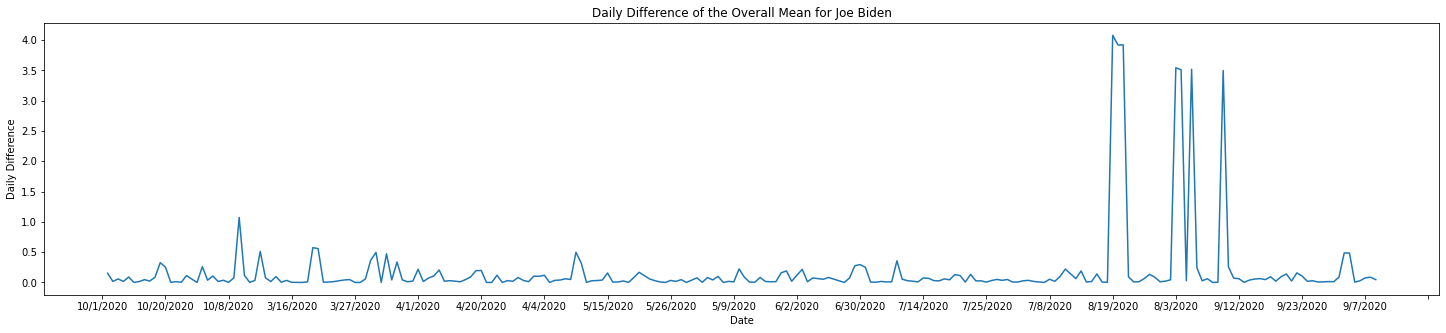

In [309]:
### RQ 1
# Map out each date and the pct estimate on a plot
# Calculate the change vs the previous day for Joe biden
# Find the biggest change

#1. Drop all Trump rows
research1 = poll_averages.loc[lambda x: ~x['candidate_name'].str.contains("Trump")]

#2. Group by date and mean
research1 = research1.groupby("modeldate").mean()

#3. Calculate daily difference in pct_estimate (absolute value because we only care about total change)
research1 = research1.assign(daily_difference=lambda x: abs(x - x.shift(1)))

#4. Reset index so we can access modeldate
research1 = research1.reset_index()

#Save to file
research1.to_csv("../data/processed/research_question_1.csv")

fig = plt.gcf()
fig.set_size_inches(25, 5)
plot1 = sns.lineplot(data=research1, x='modeldate', y='daily_difference')
plot1.set_title('Daily Difference of the Overall Mean for Joe Biden')
plot1.set_ylabel('Daily Difference')
plot1.set_xlabel('Date')
plot1.xaxis.set_major_locator(ticker.MultipleLocator(12))

Text(0.5, 0, 'Mean Daily Difference')

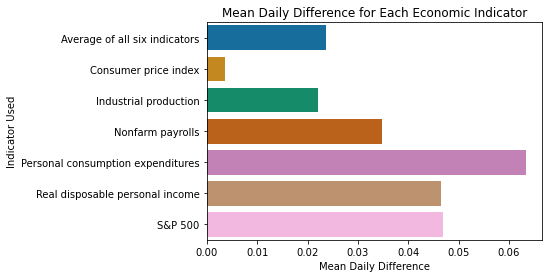

In [310]:
### RQ 2
# Calculate the total change in each indicator
research2 = economy.copy()

#Flip dataframe to start on proper date
research2 = research2.iloc[::-1]

#For each indicator: calculate the change since the previous day for that indicator
research2 = research2.assign(daily_difference=lambda x: abs(x['current_zscore'] - x.shift(7)['current_zscore']))

#Find which indicator had the lowest mean change for every day.
research2 = research2.groupby('indicator').mean()

#Reset index so we can access indicator
research2 = research2.reset_index()

#Save to file
research2.to_csv("../data/processed/research_question_2.csv")

plot2 = sns.barplot(data=research2, y='indicator', x='daily_difference', palette='colorblind')
plot2.set_title('Mean Daily Difference for Each Economic Indicator')
plot2.set_ylabel('Indicator Used')
plot2.set_xlabel('Mean Daily Difference')

Text(0.5, 1.0, 'Minimum Mean Percent Estimate of Each State for Donald Trump')

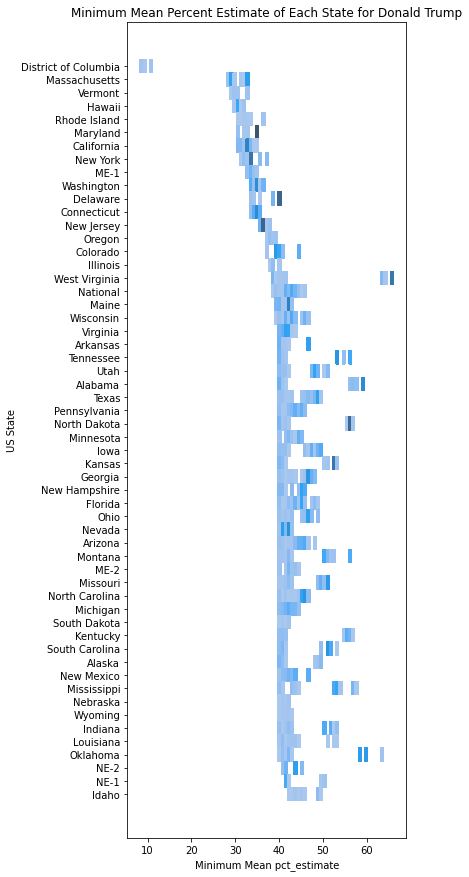

In [311]:
### RQ 3
#Map out the minimum polling estimate for each day for Trump.

#Remove all Joe Biden rows
research3 = poll_averages.loc[lambda x: ~x['candidate_name'].str.contains("Biden")]

#Group by date and state, find the minimum pct_estimate, and convert back to a dataframe
research3 = research3.groupby(['modeldate', 'state'])['pct_estimate'].min().to_frame()

#Sort ascending by pct_estimate
research3 = research3.sort_values(by='pct_estimate')

#Save to file
research3.to_csv("../data/processed/research_question_3.csv")

fig = plt.gcf()
fig.set_size_inches(5, 15)
plot3 = sns.histplot(data=research3, y='state', x='pct_estimate')
plot3.set_xlabel('Minimum Mean pct_estimate')
plot3.set_ylabel('US State')
plot3.set_title('Minimum Mean Percent Estimate of Each State for Donald Trump')

# Summary
- Were there any days in which the mean polling pct_estimate for Joe Biden jumped or had a drastic change?
  - Yes, on 8/19/2020 the mean change for Joe Biden was 4 points.
  - There were a few days with absolutely no change at all, which may indicate missing points in the dataset.


- Which economic indicator has been the most stable over time?
  - The most stable indicator has been the Consumer Price Index
  - The most unstable indicator has been Personal Consumption Expenditures


- Has the minimum polling pct_estimate state changed over time for Donald Trump?
  - No, it has not changed and it has always been District of Columbia with a large difference with the next lowest state.